<h2 style="color:#32642D">The purpose of the project is to forecast the cost of apartment buildings in Tashkent region.<br>Цель проекта - прогноз стоимости многоквартирных домов в Ташкентской области.<br>Loyihadan ko'zlangan maqsad, Toshkent viloyatidagi ko'pm qavatli uylarning narxini bashorat qilish.</h2>

<p style="color:#32642D"> we can call the libraries we need<br>Вызов набора данных, необходимого для проекта<br>biz uchun zarur kutubxonalarni chaqirib olamiz.</p>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="color:#32642D">Loyiha uchun zarur bo'lgan ma'lumotlar to'plamini chaqirish <br> Вызов набора данных, необходимого для проекта <br> Calling the dataset needed for the project</p>

In [33]:
url = "/home/mustafa/programming/data-scince/projects/tashkent_house/tashkent-housing.csv"
df = pd.read_csv(url, index_col=0)

<p style="color:#32642D">From the information given about each house, we find the approximate cost using machine learning<br>из предоставленной информации о каждом доме находим примерную стоимость с помощью машинного обучения<br>Har bir uy haqida berilgan ma'lumotlardan, taxminiy narxni machine learning yordamida topamiz</p>


In [34]:
df

,rooms,size,level,max_levels,location,district,price
0,3.0,57.0,4.0,4.0,1.0,1.0,52000.0
1,2.0,52.0,4.0,5.0,2.0,2.0,56000.0
2,2.0,42.0,4.0,4.0,3.0,3.0,37000.0
3,3.0,65.0,1.0,4.0,4.0,3.0,49500.0
4,3.0,70.0,3.0,5.0,5.0,3.0,55000.0
...,...,...,...,...,...,...,...
7560,1.0,38.0,5.0,5.0,876.0,6.0,24500.0
7561,2.0,49.0,1.0,4.0,264.0,6.0,32000.0
7562,2.0,64.0,3.0,9.0,738.0,8.0,40000.0
7563,1.0,18.0,1.0,4.0,120.0,5.0,11000.0


<p style="color:#32642D">Check the general information.<br>проверить общую информацию.<br>Umumiy ma'lumotlarni tekshiramiz.</p>

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rooms       6853 non-null   float64
 1   size        6853 non-null   float64
 2   level       6853 non-null   float64
 3   max_levels  6853 non-null   float64
 4   location    6853 non-null   float64
 5   district    6853 non-null   float64
 6   price       6853 non-null   float64
dtypes: float64(7)
memory usage: 428.3 KB


<p style="color:#32642D">Now let’s look at the values of each column<br>Теперь давайте посмотрим на значения каждого столбца<br>Har bir ustunning qiymatlarni ko'rib chiqamiz</p>

In [43]:
for x in df.columns:
    print(f"{df[x].describe()}\n")

count    6853.000000
mean        2.618707
std         1.056399
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

count    6853.000000
mean       72.074979
std        31.429689
min        11.000000
25%        50.000000
50%        66.000000
75%        85.000000
max       230.000000
Name: size, dtype: float64

count    6853.000000
mean        3.711659
std         2.254859
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        19.000000
Name: level, dtype: float64

count    6853.000000
mean        6.054721
std         2.625109
min         1.000000
25%         4.000000
50%         5.000000
75%         9.000000
max        25.000000
Name: max_levels, dtype: float64

count    6853.000000
mean      366.320298
std       395.730512
min         1.000000
25%        69.000000
50%       205.000000
75%       532.000000
max      1595.000000
Name: location, dtype: float64

count   

<p style="color:#32642D">Which column the house price depends on is high.<br>От какого столбца зависит цена дома — высокий.<br>Uy narxining qaysi ustunlarga bog'liqligi yuqori.</p>

In [44]:
df.corrwith(df['price'])

rooms         0.645377
size          0.763117
level         0.088095
max_levels    0.263900
location      0.030140
district      0.090755
price         1.000000
dtype: float64

<p style="color:#32642D">Using visualization, we draw a final conclusion about the dataset.<br>Используя визуализацию, мы делаем окончательный вывод о наборе данных.<br>Vizualizatsiya yordamida dataset haqida yakuniy xulosa chiqaram</p>

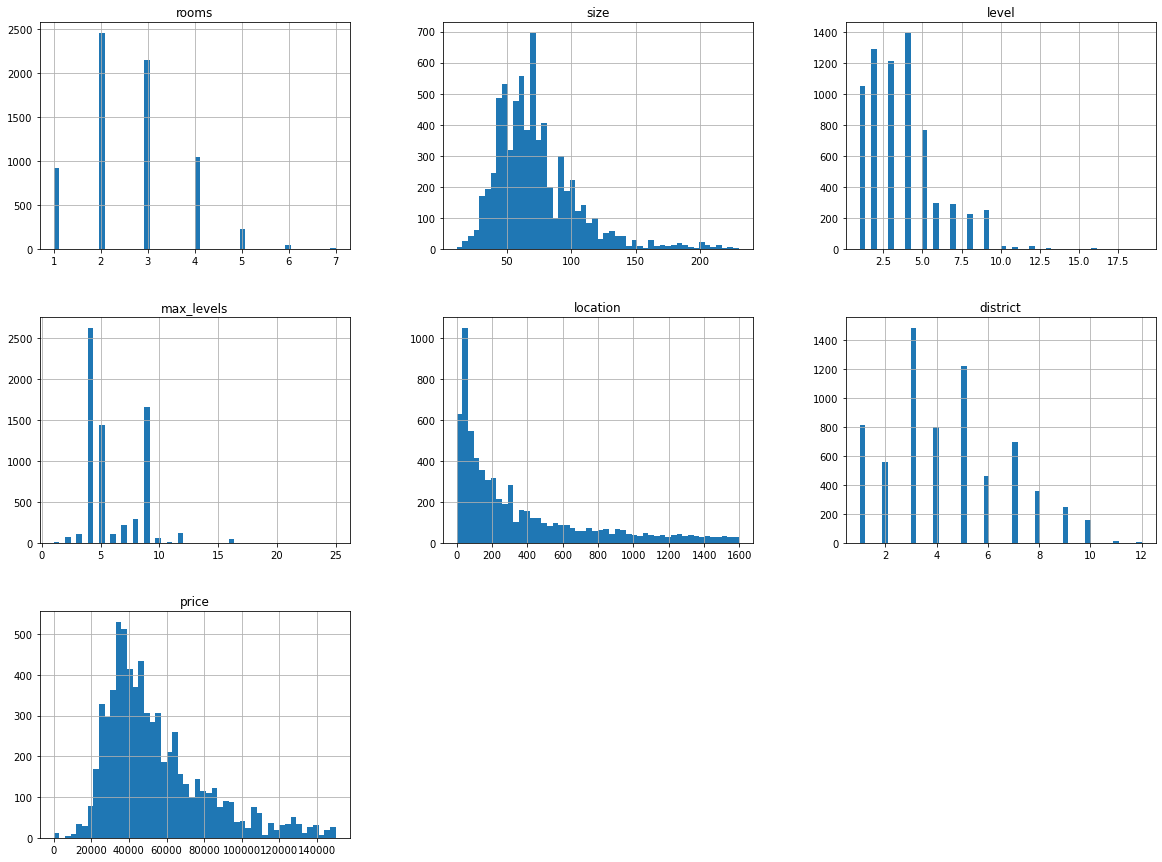

In [42]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<p style="color:#32642D">We divide the data for the model into 2 parts.
training 80% and test 20%<br>Делим данные для модели на 2 части.
обучение 80% и тестирование 20%<br>Model uchun ma'lumotlarni 2 qismga bo'lib olamiz.
training 80% va test 20%</p>




In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_set ,test_set = train_test_split(df, test_size=0.2, random_state=45)
train_set.head(10)

,rooms,size,level,max_levels,location,district,price
1970,4.0,135.0,4.0,4.0,38.0,3.0,95000.0
1402,3.0,70.0,1.0,9.0,46.0,4.0,60000.0
1138,2.0,52.0,4.0,5.0,19.0,2.0,32000.0
768,3.0,75.0,2.0,9.0,162.0,5.0,45500.0
716,2.0,58.0,1.0,5.0,233.0,1.0,58000.0
6229,2.0,47.0,1.0,4.0,29.0,3.0,33000.0
2775,2.0,50.0,4.0,4.0,195.0,1.0,33500.0
4273,3.0,86.0,2.0,5.0,158.0,5.0,57000.0
1944,1.0,36.0,4.0,4.0,127.0,5.0,21000.0
7538,2.0,58.0,2.0,4.0,35.0,1.0,40000.0


<p style="color:#32642D">We separate the prices and delete them.<br>Мы разделяем цены и удаляем их.<br>Narxlarni ajratib olamiz va o'chirib tashlaymiz.</p>

In [48]:
y = df['price']
y
df.drop(columns='price', inplace=True)
df

,rooms,size,level,max_levels,location,district
0,3.0,57.0,4.0,4.0,1.0,1.0
1,2.0,52.0,4.0,5.0,2.0,2.0
2,2.0,42.0,4.0,4.0,3.0,3.0
3,3.0,65.0,1.0,4.0,4.0,3.0
4,3.0,70.0,3.0,5.0,5.0,3.0
...,...,...,...,...,...,...
7560,1.0,38.0,5.0,5.0,876.0,6.0
7561,2.0,49.0,1.0,4.0,264.0,6.0
7562,2.0,64.0,3.0,9.0,738.0,8.0
7563,1.0,18.0,1.0,4.0,120.0,5.0


<p style="color:#32642D">We bring the data into one form<br>Приводим данные в единую форму<br>Ma'lumotlarni bir shaklga olib kelamiz</p>



In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
min_max_scaler = MinMaxScaler()

In [53]:
x_training = min_max_scaler.fit_transform(df)
x_training

array([[3.33333333e-01, 2.10045662e-01, 1.66666667e-01, 1.25000000e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.66666667e-01, 1.87214612e-01, 1.66666667e-01, 1.66666667e-01,
        6.27352572e-04, 9.09090909e-02],
       [1.66666667e-01, 1.41552511e-01, 1.66666667e-01, 1.25000000e-01,
        1.25470514e-03, 1.81818182e-01],
       ...,
       [1.66666667e-01, 2.42009132e-01, 1.11111111e-01, 3.33333333e-01,
        4.62358846e-01, 6.36363636e-01],
       [0.00000000e+00, 3.19634703e-02, 0.00000000e+00, 1.25000000e-01,
        7.46549561e-02, 3.63636364e-01],
       [0.00000000e+00, 8.67579909e-02, 5.55555556e-02, 1.25000000e-01,
        3.13676286e-03, 1.81818182e-01]])

<p style="color:#32642D">We create a model<br>
Мы создаем модель<br>
Model yaratamiz</p>

In [54]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

<p style="color:#32642D">We give the values to the model<br>
Придаем значения модели<br>
Qiymatlarni modelga beramiz</p>


In [55]:
LR_model.fit(x_training, y)

LinearRegression()

<p style="color:#32642D">We test the model<br>
Мы тестируем модель<br>Modelni test qilamiz</p>


In [57]:
y_test_set = test_set['price']
test_set.drop(columns='price', inplace=True)
test_set

,rooms,size,level,max_levels,location,district
6327,2.0,58.0,10.0,12.0,28.0,4.0
2462,2.0,62.0,9.0,12.0,202.0,7.0
82,2.0,45.0,4.0,4.0,6.0,3.0
646,4.0,112.0,4.0,5.0,312.0,2.0
5476,3.0,75.0,6.0,9.0,116.0,7.0
...,...,...,...,...,...,...
2392,1.0,42.0,4.0,5.0,267.0,9.0
4421,3.0,110.0,7.0,9.0,207.0,7.0
2921,3.0,70.0,1.0,4.0,120.0,5.0
3671,1.0,37.0,3.0,4.0,82.0,1.0


In [58]:
test_label = y.loc[test_set.index]
test_label

6327     36000.0
2462     53000.0
82       45000.0
646     146500.0
5476     60000.0
          ...   
2392     22800.0
4421     70000.0
2921     72500.0
3671     31000.0
1089     40000.0
Name: price, Length: 1371, dtype: float64

In [60]:
test_data = min_max_scaler.fit_transform(test_set)
test_data

array([[0.16666667, 0.20722529, 0.6       , 0.45833333, 0.0170347 ,
        0.27272727],
       [0.16666667, 0.22729553, 0.53333333, 0.45833333, 0.12681388,
        0.54545455],
       [0.16666667, 0.14199699, 0.2       , 0.125     , 0.00315457,
        0.18181818],
       ...,
       [0.33333333, 0.26743603, 0.        , 0.125     , 0.07507886,
        0.36363636],
       [0.        , 0.1018565 , 0.13333333, 0.125     , 0.0511041 ,
        0.        ],
       [0.33333333, 0.26743603, 0.26666667, 0.16666667, 0.09526814,
        0.        ]])

In [61]:
predict = LR_model.predict(test_data)
predict

array([39256.5639877 , 43120.61411687, 32093.42959034, ...,
       55122.99435498, 26081.77318702, 49842.82557365])

<p style="color:#32642D">Let's get acquainted with the test results<br>
Знакомимся с результатами<br>
Test natijalari bilan tanishamiz</p>

In [65]:

pd.DataFrame({"prediction": predict, "default value": test_label})

,prediction,default value
6327,39256.563988,36000.0
2462,43120.614117,53000.0
82,32093.429590,45000.0
646,80326.683879,146500.0
5476,55568.843077,60000.0
...,...,...
2392,28230.723888,22800.0
4421,75904.473792,70000.0
2921,55122.994355,72500.0
3671,26081.773187,31000.0


<p style="color:#32642D">We calculate the average error made by our model<br>
Мы рассчитываем среднюю ошибку, допущенную нашей моделью<br>
Modelimiz qilgan o'rtacha xatolikni hisoblaymiz</p>


In [76]:
from sklearn.metrics import mean_absolute_error
mar = mean_absolute_error(test_label, predict)
mar

11815.117017111012

In [77]:
print(f"Average absolute error = {mar}")

Average absolute error = 11815.117017111012
